## Goal: Create a 2 class classifier using a single feature 

- We are provided with two normally distributed classes which have some overlap 
- How do we create a simple classifier which can distinguish (with somewhat decent performance) a given value into either of the two classes

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

1. Create the two normally distributed classes with some degree of overlap - can play around with the mean and std of both using np.random.normal
2. Visualize the two using binning


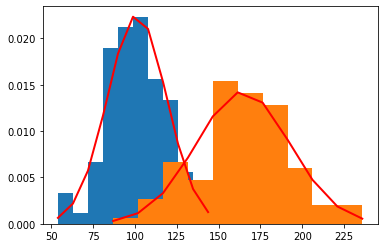

In [139]:
np.random.seed(1)

A= np.random.normal(100, 20, 100)
B= np.random.normal (160, 30, 100)

mean_A= np.mean(A)
std_A= np.std (A)

mean_B= np.mean(B)
std_B= np.std (B)

count, bins, ignored = plt.hist(A, 10, density=True)
plt.plot(bins, 1/(std_A * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mean_A)**2 / (2 * std_A**2) ),
         linewidth=2, color='r')

count, bins, ignored = plt.hist(B, 10, density=True)
plt.plot(bins, 1/(std_B * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mean_B)**2 / (2 * std_B**2) ),
         linewidth=2, color='r')

- Our classifier calculates the Z-score of the value provided when compared with both classes' mean and std 
- A z-score is often used as a tool to perform outlier detection 
- In our classifier method defined below, the classifier takes in both classes' distributions as well as the unknown value we're trying to classify 
- It returns it's best estimate of whether the Z-score falls within the purview of class A or class B 

In [131]:
def ourclassifier (A, B, value): 
    mean_A= np.mean(A)
    std_A= np.std (A)
    
    mean_B= np.mean(B)
    std_B= np.std (B)
    
    z_A =np.abs(( value- mean_A )/ std_A )
    z_B = np.abs((value- mean_B)/ std_B)
    
#     print (mean_A,std_A, z_A) 
#     print (mean_B,std_B, z_B)
   
    if z_A < z_B: 
        if z_A <3 :
            return  ("A")
        else: 
            return ("outlier")
        
    elif z_B < z_A: 
        if z_B <3: 
            return ("B")
        else: 
            return ("outlier")
        

In [134]:
## Generate a Random value and it'll let you know its class and whether it's an outlier. 
value = np.random.randint (40, 300)


print (value, ourclassifier (A, B, value)) 

274 outlier


In [ ]:
our